 # Proyecto EDA con python

### Descripción:

Estos conjuntos de datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente para determinar si el producto (depósito a plazo bancario) sería suscrito o no. 

Inicialmente disponemos de 2 dataset, 'bank-additional.csv' con datos importantes de los clientes, y 'customer-details.xlsx', que es un archivo Excel que nos da información sobre las características demográficas y comportamiento de compra de los clientes del banco. Este Excel consta de 3 hojas de trabajo diferentes, en cada una de ellas tenemos los clientes que entraron en el banco en diferentes años. 


### Objetivos:

Realizar un análisis exploratorio de datos con python y analizar que tipo de clientes son más propensos a aceptar un depósito a plazo bancario.

Se pretende curbir la transformación y limpieza de datos, análisis descriptivo, visualziación de los datos y un informe explicativo.

-----------------------------

**Paso 1:** Cargamos las librerías necesarias para llevar a cabo el proyecto

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

---------------------------------

**Paso 2:** Queremos tener todos los datos juntos para entenderlos y analizarlos mejor, por lo que cargaremos ambos archivos y trataremos de unirlos en un solo dataframe

Cargamos primero el csv y comprobamos que ha funcionado correctamente:

In [3]:
df_csv= pd.read_csv('bank-additional.csv', index_col = 0)
df_csv.sample(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
852,31.0,services,MARRIED,basic.6y,0.0,1.0,0.0,telephone,492,2,...,1.1,"93,994","-36,4",NaN,5191,no,9-septiembre-2016,29.245,-95.492,34e1f0a2-f7dc-4475-b785-1f4362985ef5
23496,40.0,admin.,MARRIED,university.degree,0.0,0.0,0.0,cellular,13,11,...,1.4,"93,444","-36,1","4,962","5228,1",no,30-noviembre-2015,46.243,-119.669,e2730a82-94c7-4929-a013-e04957d7791c
7866,35.0,blue-collar,MARRIED,basic.9y,0.0,1.0,0.0,telephone,373,2,...,1.4,"94,465","-41,8","4,865","5228,1",no,24-septiembre-2015,46.365,-69.178,4fa66b7b-22fb-4686-ab9c-51c55c6c52b1
6614,48.0,entrepreneur,MARRIED,university.degree,0.0,0.0,0.0,telephone,226,1,...,1.1,"93,994","-36,4",NaN,5191,no,7-julio-2018,46.355,-85.417,22a1d0a8-6df8-4d01-88fd-31d43d74b518
27565,58.0,management,DIVORCED,university.degree,0.0,1.0,0.0,telephone,39,2,...,-0.1,"93,2",-42,"4,021","5195,8",no,5-agosto-2015,27.512,-87.239,ab561b97-2375-46db-8aa7-d4f91661e23a


Cargamos ahora el archivo Excel que contiene tres hojas diferentes, cada una representando datos de un año específico. Para ello, creamos un DataFrame separado para cada hoja. A continuación, añadimos una columna que indica el año correspondiente a cada DataFrame. Esto nos permitirá combinar los tres conjuntos de datos en uno solo. Utilizaremos la función pd.concat() para unir los DataFrames, ya que todos comparten la misma estructura de columnas.

In [4]:
df_2012 = pd.read_excel('customer-details.xlsx', sheet_name='2012', index_col=0)
df_2013 = pd.read_excel('customer-details.xlsx', sheet_name='2013', index_col=0)
df_2014 = pd.read_excel('customer-details.xlsx', sheet_name='2014', index_col=0)

In [5]:
df_2012['Entry_Year'] = 2012
df_2013['Entry_Year'] = 2013
df_2014['Entry_Year'] = 2014

In [6]:
df_2012.head()

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,Entry_Year
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,2012
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,2012
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,2012
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,2012
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,2012


In [7]:
df_2013.sample(5)

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,Entry_Year
5329,166350,2,2,2013-01-24,28,8dd10860-ca2d-46cb-849d-eace30876961,2013
4071,78665,2,1,2013-01-26,22,e48c8fb7-8abe-4667-aa8c-88137e5b0fa8,2013
8159,70514,1,1,2013-05-01,30,e7ff40d6-0a58-42da-88e8-b33d0090b65f,2013
3319,34884,1,1,2013-03-23,18,e5d3e952-9557-429c-bc20-a75ce38ba40e,2013
6613,45952,1,0,2013-03-03,15,81955fa1-eba9-41d8-bceb-d52a8b2d723b,2013


In [8]:
df_2014.tail()

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,Entry_Year
14085,156980,1,2,2014-05-17,7,5f432048-d515-4bb5-9c94-62db451f88d4,2014
14086,139820,0,0,2014-09-29,1,993bbbd6-4dbc-4a40-a408-f91f8462bee6,2014
14087,78470,2,2,2014-10-28,12,d6271666-319d-42c8-a741-cb22bf2c2093,2014
14088,144218,0,1,2014-07-01,9,f67fbfa8-6573-414d-a805-b26a2f1b1ceb,2014
14089,115155,0,2,2014-12-25,7,9727bc06-c11a-461a-a5bb-3d210467cc2a,2014


Veremos antes el número de filas que suman entre los 3 df para asegurarnos que no perdemos ningún dato en la concatenación

In [9]:
df_2012.shape[0] + df_2013.shape[0] + df_2014.shape[0]

43170

In [10]:
df_excel = pd.concat([df_2012, df_2013, df_2014], ignore_index=True)

In [11]:
df_excel.sample(5)

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,Entry_Year
23258,93327,0,0,2013-09-18,31,1afbb56b-cea0-41ef-b09e-9bee760a746f,2013
39609,159102,1,1,2014-01-28,25,e1e18a5d-dd68-410c-a028-28be7f152e6b,2014
37524,46641,2,1,2014-06-09,12,5956e309-cd1d-4f5a-b11b-3ddd7187166f,2014
35942,169845,1,2,2014-07-22,15,39219450-11c6-4be0-8b1f-ee1c9df11d49,2014
5528,80996,1,1,2012-09-13,10,75482015-c5ae-491c-bc9f-5ab7fb85b5af,2012


In [12]:
df_excel.shape

(43170, 7)

Vemos que ha cargado correctamente y no hemos perdido ningún dato.

Ya tenemos un dataframe con los datos del csv y otro con los del excel, ahora necesitamos fusionarlos en uno solo con las columnas de ambos dataframes. Esta unión se hace gracias a la columna ID, ya que es la que comparten, y haremos un merge:

Antes, como la columna id no se llama igual, la renombramos en el df de csv

In [13]:
df_csv.rename(columns={'id_': 'ID'}, inplace=True)

In [14]:
df_csv.shape

(43000, 23)

Vemos que el df de excel tiene 170 registros más de clientes, igualmente haremos una union inner ya que si la mayoría de datos son nulos y solo tenemos el ID, no nos servirá de nada analizar esto, además, podemso permitirnos una perdida tan baja de datos.

In [15]:
df = df_csv.merge(df_excel, on='ID', how='inner')

In [16]:
df.sample(5).T

,41228,42249,7515,16938,32202
age,38.0,48.0,37.0,37.0,33.0
job,admin.,unemployed,admin.,admin.,blue-collar
marital,SINGLE,DIVORCED,MARRIED,MARRIED,MARRIED
education,university.degree,basic.4y,high.school,basic.6y,basic.9y
default,NaN,0.0,0.0,0.0,0.0
housing,1.0,0.0,0.0,1.0,0.0
loan,0.0,1.0,0.0,1.0,0.0
contact,telephone,telephone,telephone,cellular,cellular
duration,35,119,80,1602,428
campaign,1,2,2,6,1


Ya tenemos todos los datos cargados en un solo dataframe, ya podemos empezar el EDA

---------------------------------

**Paso 3:** Entender los datos que tenemos

Queremos saber primero número de filas y columnas que tenemos para ver la dimensión del dataframe

In [17]:
df.shape

(43000, 29)

Observamos que hay 43.000 filas y 29 columnas en total, cada fila representa a un cliente del banco

Crearemos una lista con todas las columnas que tenemos, una pequeña explicación, indicaremos de que tipo es cada columna, posibles valores y algunas observaciones para iniciar la limpieza. Para ello, sacaremos esa información con pocas líneas de código

In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'latitude', 'longitude', 'ID', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth',
       'Entry_Year'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age                37880 non-null  float64       
 1   job                42655 non-null  object        
 2   marital            42915 non-null  object        
 3   education          41193 non-null  object        
 4   default            34019 non-null  float64       
 5   housing            41974 non-null  float64       
 6   loan               41974 non-null  float64       
 7   contact            43000 non-null  object        
 8   duration           43000 non-null  int64         
 9   campaign           43000 non-null  int64         
 10  pdays              43000 non-null  int64         
 11  previous           43000 non-null  int64         
 12  poutcome           43000 non-null  object        
 13  emp.var.rate       43000 non-null  float64       
 14  cons.p

In [20]:
df.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,latitude,longitude,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,Entry_Year
count,37880.000000,34019.000000,41974.000000,41974.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000,43000.000000,43000.000000
mean,39.977112,0.000088,0.535998,0.155620,257.739279,2.567233,962.330953,0.174023,0.077128,36.856697,-95.939067,93241.200070,1.004791,0.998605,2013-05-12 07:05:06.083720960,16.589698,2012.861535
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,24.396000,-124.997000,5841.000000,0.000000,0.000000,2012-01-01 00:00:00,1.000000,2012.000000
25%,32.000000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,30.614750,-110.494250,49610.000000,0.000000,0.000000,2012-07-16 00:00:00,9.000000,2012.000000
50%,38.000000,0.000000,1.000000,0.000000,179.000000,2.000000,999.000000,0.000000,1.100000,36.761000,-95.899500,93050.500000,1.000000,1.000000,2013-03-02 00:00:00,17.000000,2013.000000
75%,47.000000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,1.400000,43.113250,-81.427750,136744.500000,2.000000,2.000000,2014-03-29 00:00:00,25.000000,2014.000000
max,98.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,49.384000,-66.937000,180802.000000,2.000000,2.000000,2014-12-31 00:00:00,32.000000,2014.000000
std,10.437957,0.009390,0.498708,0.362499,258.666033,2.772294,187.260394,0.497366,1.573898,7.225948,16.752282,50498.316182,0.815913,0.815983,NaN,9.239205,0.879460


In [21]:
categorical_columns = df.select_dtypes(include=['object']).columns  

for col in categorical_columns:
    print(f"\n--- {col} ---")
    print(df[col].unique())



--- job ---
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']

--- marital ---
['MARRIED' 'SINGLE' 'DIVORCED' nan]

--- education ---
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']

--- contact ---
['telephone' 'cellular']

--- poutcome ---
['NONEXISTENT' 'FAILURE' 'SUCCESS']

--- cons.price.idx ---
['93,994' nan '94,465' '93,918' '93,444' '93,798' '93,2' '92,756' '92,843'
 '93,075' '92,893' '92,963' '92,469' '92,201' '92,379' '92,431' '92,649'
 '92,713' '93,369' '93,749' '93,876' '94,055' '94,215' '94,027' '94,199'
 '94,601' '94,767']

--- cons.conf.idx ---
['-36,4' '-41,8' '-42,7' '-36,1' '-40,4' '-42' '-45,9' '-50' '-47,1'
 '-46,2' '-40,8' '-33,6' '-31,4' '-29,8' '-26,9' '-30,1' '-33' '-34,8'
 '-34,6' '-40' '-39,8' '-40,3' '-38,3' '-37,5' '-49,5' '-50,8']

--- euribor3m ---
['4,857' nan '4,856' '4,855' '4,859' '4,86' '4,858' '4,8

Vamos a ver ahora número de nulos y duplicados:

In [22]:
df.duplicated().sum()

np.int64(0)

No hay duplicados

In [23]:
df.isnull().sum()

age                  5120
job                   345
marital                85
education            1807
default              8981
housing              1026
loan                 1026
contact                 0
duration                0
campaign                0
pdays                   0
previous                0
poutcome                0
emp.var.rate            0
cons.price.idx        471
cons.conf.idx           0
euribor3m            9256
nr.employed             0
y                       0
date                  248
latitude                0
longitude               0
ID                      0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer             0
NumWebVisitsMonth       0
Entry_Year              0
dtype: int64

In [24]:
df.isnull().sum() / df.shape[0] * 100

age                  11.906977
job                   0.802326
marital               0.197674
education             4.202326
default              20.886047
housing               2.386047
loan                  2.386047
contact               0.000000
duration              0.000000
campaign              0.000000
pdays                 0.000000
previous              0.000000
poutcome              0.000000
emp.var.rate          0.000000
cons.price.idx        1.095349
cons.conf.idx         0.000000
euribor3m            21.525581
nr.employed           0.000000
y                     0.000000
date                  0.576744
latitude              0.000000
longitude             0.000000
ID                    0.000000
Income                0.000000
Kidhome               0.000000
Teenhome              0.000000
Dt_Customer           0.000000
NumWebVisitsMonth     0.000000
Entry_Year            0.000000
dtype: float64

Ya tenemos los datos suficientes para crear una primera tabla de metadatos

| Nombre              | Tipo de Variable   | Descripción                            | Posibles Valores        | Observaciones |
|---------------------|-------------------|----------------------------------------|-------------------------|--------------| 
| age                | Numérica Discreta  | Edad del cliente                      | 18 - 100               | Pasar de float a int y ver posibles valores incorrectos, 11% de nulos              |
| job                | Categórica Nominal | Profesión del cliente                 | 'housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'entrepreneur', 'student'  | Cambiar el punto de admin, tratar pequeño % de nulos            |
| marital            | Categórica Nominal | Estado civil del cliente                           | 'married', 'single', 'divorced'    | Pasar a minúsculas los valores, tratar pequeño % de nulos               |
| education          | Categórica Ordinal | Nivel educativo del cliente                       | 'basic', 'high.school', professional.course', 'university.degree', 'illiterate' | Unir los niveles de basic en uno solo y tratar 4% de nulos             |
| default           | Binaria | Indica si el cliente tiene algún historial de incumplimiento de pagos              | (1: Sí, 0: No)          | Cambiar tipo a int, 20% de nulos             |
| housing           | Binaria | Indica si el cliente tiene un préstamo hipotecario                  | (1: Sí, 0: No)            | Cambiar tipo a int, tratar pequeño % de nulos                   |
| loan              | Binaria | Indica si el cliente tiene algún otro tipo de préstamo           | (1: Sí, 0: No)          | Cambiar tipo a int, tratar pequeño % de nulos                  |
| contact           | Categórica Nominal | El método de contacto utilizado para comunicarse con el cliente                   | 'cellular', 'telephone'|              |
| duration          | Numérica Discreta  | La duración en segundos de la última interacción con el cliente    | >= 0               | Ver posibles outliers o valores incorrectos, la media se aleja mucho del valor máximo             |
| campaign         | Numérica Discreta  | El número de contactos realizados durante esta campaña para este cliente     | >= 0                 | Ver posibles outliers o valores incorrectos, la media se aleja mucho del valor máximo              |
| pdays            | Numérica Discreta  | Número de días que han pasado desde la última vez que se contactó con el cliente durante esta campaña            | >= 0            | Ver porque la mayoría de los datos es 999, posible error de representación |
| previous         | Numérica Discreta  | Número de veces que se ha contactado con el cliente antes de esta campaña          | >= 0                | Ver posibles outliers              |
| poutcome         | Categórica Nominal | Resultado de la campaña de marketing anterior     | 'failure', 'success', 'nonexistent'   | Cambiar a minúsculas los valores              | 
| emp.var.rate     | Numérica Continua  | Tasa de variación del empleo          | -5.0 - 5.0             | Cambiar '.' por '_' y ver posibles outliers              |
| cons.price.idx   | Numérica Continua  | Índice de precios al consumidor       | 80.0 - 120.0           | Cambiar '.' por '_', ver posibles outliers y cambiar a float, tratar pequeño % de nulos               |
| cons.conf.idx    | Numérica Continua  | Índice de confianza del consumidor    | -50.0 - 50.0           | Cambiar '.' por '_', ver posibles outliers y cambiar a float              |
| euribor3m       | Numérica Continua  | La tasa de interés de referencia a tres meses                    | -1 - 5.0              | Tiene muchos valores nulos, cambiar a float |
| nr.employed      | Numérica Discreta  | Número de empleados                   | >= 0            |              | Cambiar tipo a int
| y                | Binaria | Indica si el cliente ha suscrito un producto o servicio        | (1: Sí, 0: No)           | Variable objetivo, cambiar tipo a int y representarlo con 0 o 1     |
| date            | Datetime | La fecha en la que se realizó la interacción con el cliente                   | 2015 - 2024           | Pasarlo a formato date, tratar pequeño % de nulos               |
| latitude         | Numérica Continua  | Latitud de ubicación                  | -90 a 90               | No concuerda con el enunciado ni tiene sentido, borrar              |
| longitude        | Numérica Continua  | Longitud de ubicación                 | -180 a 180             | No concuerda con el enunciado ni tiene sentido, borrar              |
| ID               | ID | Identificador único del cliente       | random                 | Es un identificador único y no debe modificar ni utilizar en el análisis              |
| Income          | Numérica Discreta  | Representa el ingreso anual del cliente en términos monetarios         | >= 0          | Ver posibles outliers              |
| Kidhome         | Numérica Discreta  | Indica el número de niños en el hogar del cliente    | 0 - 5                 | Ver posibles errores              |
| Teenhome        | Numérica Discreta  | Indica el número de adolescentes en el hogar del cliente       | 0 - 5                  | Ver posibles errores             |
| Dt_Customer     | Datetime | Representa la fecha en que el cliente se convirtió en cliente de la empresa           | 2012 - 2024           | Ver si con el entry year debemos borrar alguna de estas dos variables por repetición             |
| NumWebVisitsMonth | Numérica Discreta | Número de visitas web mensuales del cliente       | >= 0                 |              | Ver posibles errores
| Entry_Year      | Numérica Discreta  | Año en que el cliente se convirtió en cliente del banco         | 2012 - 2024            | Ver posibles errores               |


Ya tenemos una gran compresión inicial de nuestros datos, podemos pasar a tratar las observaciones

---------------------------

**Paso 4:** Limpieza de datos

Empezaremos eliminando las dos columnas que vimos que no concuerdan con el enunciado del problema

Teníamos dudas en si eliminar dt_customer o entry_year, por el momento las dejaremos ya que no sabemos aún si necesiatermos la fecha completa

In [25]:
df.drop(columns=['latitude', 'longitude'], inplace=True)

Una vez eliminadas esas columnas,vamos a renombrar el resto para que sigan la misma estructura, pasaremos todo a minúscula y cambiaremos "." por "_"

In [26]:
df.columns = df.columns.str.lower().str.replace('.', '_')
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'y', 'date', 'id', 'income', 'kidhome', 'teenhome',
       'dt_customer', 'numwebvisitsmonth', 'entry_year'],
      dtype='object')

Cambiaremos el nombre de algunas columnas también para un mejor entendimiento:

In [27]:
rename_dict = {
    'y': 'suscribed',
    'nr_employed': 'num_employed',
    'kidhome': 'num_kidhome',
    'teenhome': 'num_teenhome',
    'dt_customer' : "entry_date",
    'numwebvisitsmonth': 'num_web_monthly_visits',
}

df.rename(columns=rename_dict, inplace=True)

df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'num_employed', 'suscribed', 'date', 'id', 'income', 'num_kidhome',
       'num_teenhome', 'entry_date', 'num_web_monthly_visits', 'entry_year'],
      dtype='object')

Una vez hecho ese cambio inicial, pasamos a tratar los nulos que hemos observado antes

In [28]:
df.age.describe()

count    37880.000000
mean        39.977112
std         10.437957
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

Empezamos con age, vemos que tiene  un 11% de nulos, perder esa cantidad sería algo importante, por lo que mejor imputar. 

Imputaremos con la mediana, ya que es menos sensible a valores atípicos que la media. Dado que la distribución de age es relativamente simétrica, la mediana no distorsionará la información central. Este método también evita sesgos que podrían surgir de valores extremos, manteniendo la integridad de los datos sin afectar el análisis posterior. La media no sería una mala opción debido a la distribución, pero en este caso es un valor float y no nos serviría, lo cercano sería 39 o 40, que es muy similar  ala mediana.

In [29]:
median_age = df['age'].median()
median_age

np.float64(38.0)

In [30]:
df['age'] = df['age'].fillna(median_age)

In [31]:
df['age'].isnull().sum()

np.int64(0)

In [32]:
df['age'].describe()

count    43000.000000
mean        39.741698
std          9.817735
min         17.000000
25%         33.000000
50%         38.000000
75%         46.000000
max         98.000000
Name: age, dtype: float64

Vemos que hemos imputados los nulos correctamente y los valores como media o std no han cambaido demasiado.

Vamos ahora con job.

En job tenemos menos de 1% de nulos y no queremos sesgar datos ya que no hay una gran diferencia entre el valor más común, eliminaremos ya que nos podemos permitir perder esa cantidad. Igual con marital

In [33]:
df = df.dropna(subset=['job', 'marital'])

La siguiente variable es marital, aquí ya vemos que tiene más de un 4% de nulos, lo que peude ser relevante, la mejor opción es imputarlos.


In [34]:
df.education.value_counts()

education
university.degree      12646
high.school             9872
basic.9y                6267
professional.course     5457
basic.4y                4295
basic.6y                2356
illiterate                18
Name: count, dtype: int64

Para no sesgar datos los pondremos en una nueva categoria 'unknown', asi no alteramos la distribución

In [35]:
df['education'] = df['education'].fillna('unknown')

In [36]:
df.education.value_counts()

education
university.degree      12646
high.school             9872
basic.9y                6267
professional.course     5457
basic.4y                4295
basic.6y                2356
unknown                 1668
illiterate                18
Name: count, dtype: int64

La siguiente variable con nulos es default, que además tiene un gran porcentaje, 20%, por lo que hay que tratarlos y no eliminarlos también.

In [37]:
df['default'].value_counts()

default
0.0    33762
1.0        3
Name: count, dtype: int64

Vemos que tan solo tiene 3 si, un 0.01%, por lo que lo más sensato es rellenar los nulos con  0 (no)

In [38]:
df['default'] = df['default'].fillna(0)

In [39]:
df['default'].isnull().sum()

np.int64(0)

Ahora pasamos a housing y loan, aquí tenemos solamente un 2% de nulos, una cantidad que nos podemos permitir perder, por lo que para no sesgar los datos, los eliminaremos directamente. Lo mismo pasará con cons_price_idx y date

In [40]:
df['housing'].value_counts()

housing
1.0    22290
0.0    19269
Name: count, dtype: int64

In [41]:
df['loan'].value_counts()

loan
0.0    35096
1.0     6463
Name: count, dtype: int64

In [42]:
df.cons_price_idx.value_counts()

cons_price_idx
93,994    7824
93,918    6882
92,893    5952
93,444    5286
94,465    4464
93,2      3721
93,075    2540
92,201     793
92,963     727
92,431     463
92,649     372
94,215     316
94,199     315
92,843     296
92,379     268
93,369     267
94,027     240
94,055     234
93,876     219
94,601     209
92,469     183
93,749     179
92,713     177
94,767     129
93,798      48
92,756      11
Name: count, dtype: int64

In [43]:
df.dropna(subset=['housing', 'loan', 'cons_price_idx', 'date'], inplace=True)

In [44]:
df['housing'].isnull().sum()

np.int64(0)

In [45]:
df['loan'].isnull().sum()

np.int64(0)

In [46]:
df['cons_price_idx'].isnull().sum()

np.int64(0)

Solo nos queda tratar euribor, que tiene un gran procentaje de nulos, por lo que tampoco los eliminaremos

In [47]:
df.euribor3m.value_counts()

euribor3m
4,857    2172
4,962    2009
4,963    1925
4,961    1512
4,964     926
         ... 
0,895       1
4,921       1
5,045       1
0,953       1
0,956       1
Name: count, Length: 308, dtype: int64

In [48]:
df.euribor3m.describe()

count     32079
unique      308
top       4,857
freq       2172
Name: euribor3m, dtype: object

In [49]:
df['euribor3m'] = df['euribor3m'].str.replace(',', '.').astype(float)

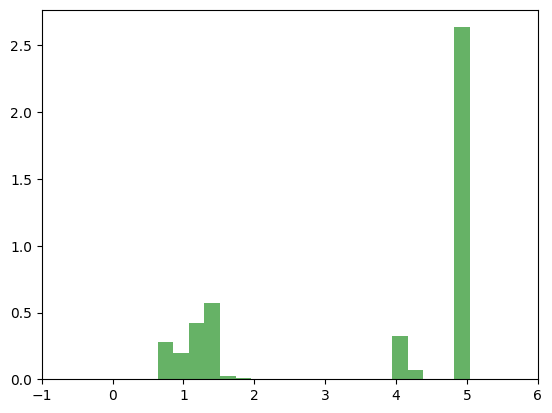

In [50]:
plt.hist(df['euribor3m'], bins=20, density=True, alpha=0.6, color='g')
plt.xticks(np.arange(-1, 7, 1)) 
plt.xlim(-1, 6)

plt.show()

Debido a  su distribución, lo categorizaremos y meteremos en la categoria más común

In [51]:
bins = [0, 1, 2, 3, 4, 5, 6]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6']

df['euribor3m_category'] = pd.cut(df['euribor3m'], bins=bins, labels=labels, right=False)

print(df[['euribor3m', 'euribor3m_category']].head())

   euribor3m euribor3m_category
0      4.857                4-5
1        NaN                NaN
2      4.857                4-5
3        NaN                NaN
4        NaN                NaN


In [52]:
df.euribor3m_category.value_counts()

euribor3m_category
4-5    21493
1-2     7513
0-1     3061
3-4       11
5-6        1
2-3        0
Name: count, dtype: int64

Meteremos entonces lo nulos en la categoria '4-5'

In [53]:
df['euribor3m_category'] = df['euribor3m_category'].fillna('4-5')

In [54]:
df.euribor3m_category.value_counts()

euribor3m_category
4-5    30283
1-2     7513
0-1     3061
3-4       11
5-6        1
2-3        0
Name: count, dtype: int64

Eliminamos por lo tanto la columna euribor3m ya que ya no nos sirve

In [55]:
df.drop(columns=['euribor3m'], inplace=True)

Ya tenemos todos lso nulos tratados, vamos a comprobarlo

In [56]:
df.isnull().sum()

age                       0
job                       0
marital                   0
education                 0
default                   0
housing                   0
loan                      0
contact                   0
duration                  0
campaign                  0
pdays                     0
previous                  0
poutcome                  0
emp_var_rate              0
cons_price_idx            0
cons_conf_idx             0
num_employed              0
suscribed                 0
date                      0
id                        0
income                    0
num_kidhome               0
num_teenhome              0
entry_date                0
num_web_monthly_visits    0
entry_year                0
euribor3m_category        0
dtype: int64

In [57]:
df.shape[0]

40869

Ya hemos tratado todos los nulos, nuestros datos han pasado de 43170 registros de clientes a 40869, una pérdida mínima que no afectará al análisis.

Ya podemos seguir con más limpieza de datos:

--------------------

Vamos a seguir cambiando los tipos necesarios como indicamos en la observaciones:

In [58]:
df[['age', 'default', 'housing', 'loan']] = df[['age', 'default', 'housing', 'loan']].astype(int)

In [59]:
df['num_employed'] = df['num_employed'].str.replace(',', '.').astype(float).astype(int)

In [60]:
df['cons_price_idx'] = df['cons_price_idx'].str.replace(',', '.').astype(float)
df['cons_conf_idx'] = df['cons_conf_idx'].str.replace(',', '.').astype(float)

Ahora pasaremos suscribed a int, haciendo que represente 1 y 0 como otras variables en vez de un object

In [61]:
df.suscribed.value_counts()

suscribed
no     36272
yes     4597
Name: count, dtype: int64

In [62]:
df['suscribed'] = df['suscribed'].map({'yes': 1, 'no': 0})

In [63]:
df.suscribed.value_counts()

suscribed
0    36272
1     4597
Name: count, dtype: int64

El último cambio de tipos que nos queda es date, que lo pasaremos a formato date, y además debemos pasar los meses de letras a números, como aquí hay más elementos además del mes, no podemos hacer un map directamente, hay que ir reemplazando uno a uno, y lo hacemos en string ya que no dejaría hacer replace con ints, cosa que nom es problema ya que lo pasaremos a formato date

In [64]:
df.date.value_counts

<bound method IndexOpsMixin.value_counts of 0             2-agosto-2019
1        14-septiembre-2016
2           15-febrero-2019
3         29-noviembre-2015
4             29-enero-2017
                ...        
42995       13-octubre-2015
42996         17-marzo-2018
42997    15-septiembre-2016
42998    23-septiembre-2019
42999      6-noviembre-2019
Name: date, Length: 40869, dtype: object>

In [65]:
months_dicc = {
    "enero": "01", "febrero": "02", "marzo": "03", "abril": "04", "mayo": "05", "junio": "06",
    "julio": "07", "agosto": "08", "septiembre": "09", "octubre": "10", "noviembre": "11", "diciembre": "12"
}


for month, num in months_dicc.items():
    df["date"] = df["date"].str.replace(month, num, regex=True)

In [66]:
df["date"] = pd.to_datetime(df["date"], format="%d-%m-%Y")

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40869 entries, 0 to 42999
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   age                     40869 non-null  int64         
 1   job                     40869 non-null  object        
 2   marital                 40869 non-null  object        
 3   education               40869 non-null  object        
 4   default                 40869 non-null  int64         
 5   housing                 40869 non-null  int64         
 6   loan                    40869 non-null  int64         
 7   contact                 40869 non-null  object        
 8   duration                40869 non-null  int64         
 9   campaign                40869 non-null  int64         
 10  pdays                   40869 non-null  int64         
 11  previous                40869 non-null  int64         
 12  poutcome                40869 non-null  object     

Ya tenemos todos los tipos cambiado correctamente.

Pasaremos a analizar cada variable individualmente, estudiante su distribución, niveles, errores ortográficos, inconsistencias o outliers.

Utilizaremos boxplots y histogramas para variables numéricas y gráficos de barras para las categóricas.

Variables categóricas:

C:\Users\sergi\AppData\Local\Temp\ipykernel_9292\2233412628.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 30)
C:\Users\sergi\AppData\Local\Temp\ipykernel_9292\2233412628.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 30)
C:\Users\sergi\AppData\Local\Temp\ipykernel_9292\2233412628.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 30)
C:\Users\sergi\AppData\Local\Temp\ipykernel_9292\2233412628.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].ge

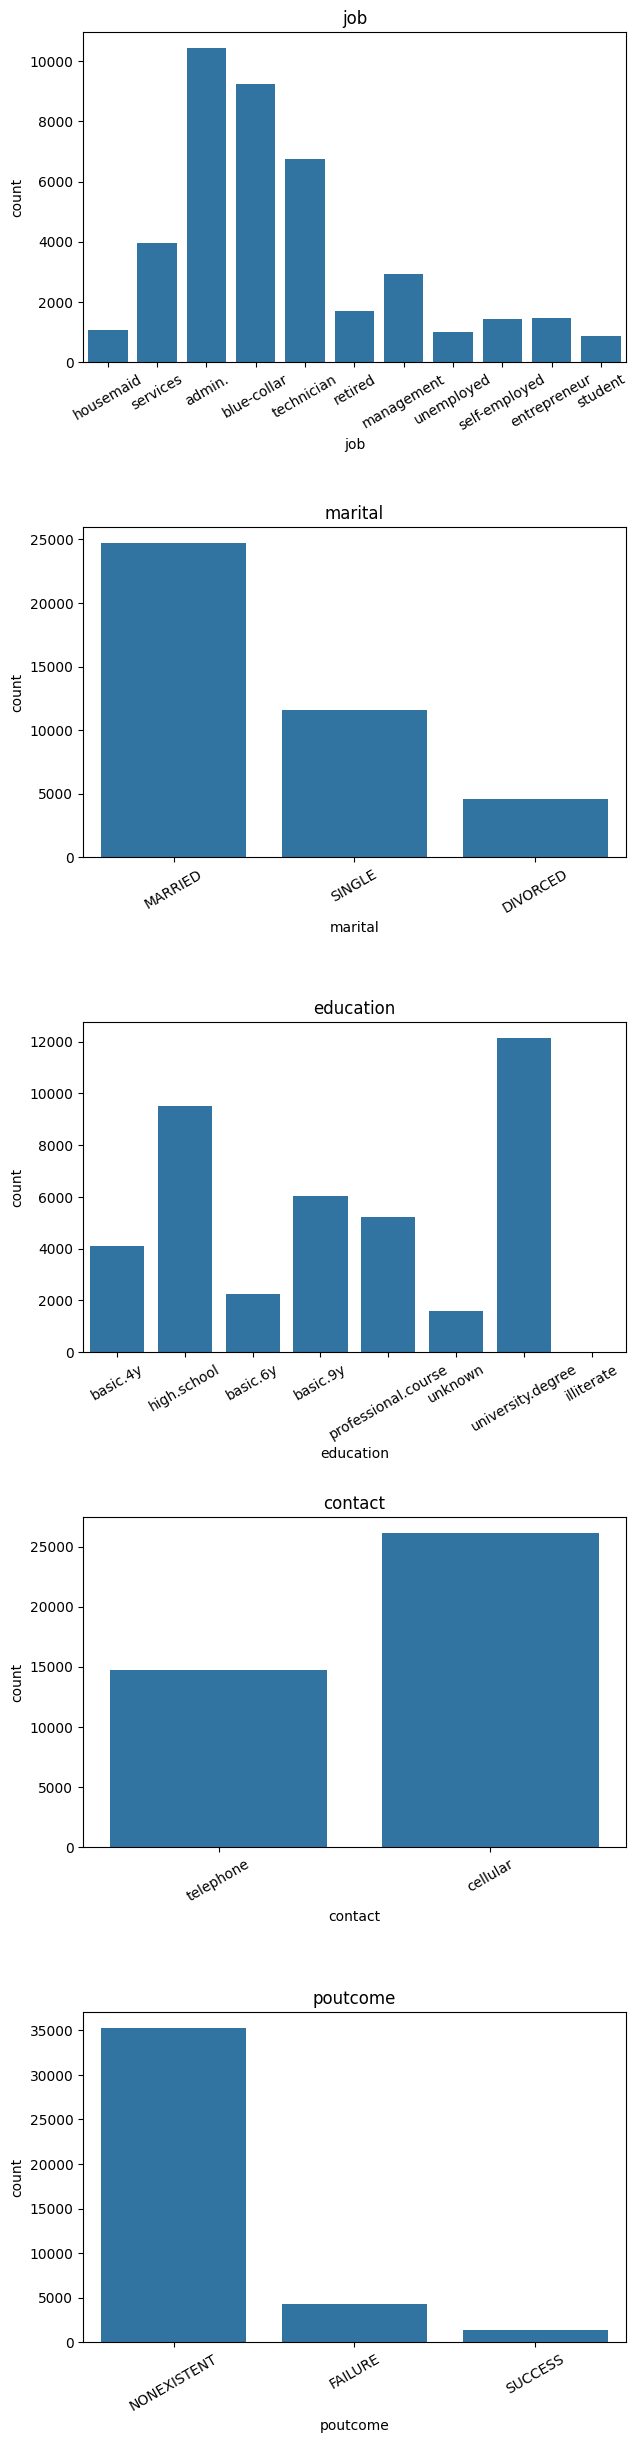

In [68]:
col_cat = ['job', 'marital', 'education', 'contact', 'poutcome']

fig, ax = plt.subplots(nrows = len(col_cat), ncols = 1, figsize = (7,30))
fig.subplots_adjust(hspace = 0.5)

for i, col in enumerate(col_cat):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 30)

Observaciones:

- job: Aquí vemos que admin contiene un . al contrario que las otras, para mantener toda la estructura igual lom quitaremos. Observamos también que la mayoría de personas son admin, blue-collar y technician, mientras que pocos son housemaid, unemployed o students

- marital: Aquí vemos como está todo en mayúsculas, pasremos a minúscula. La mayoría son casados y hay pocos divorciados

- education: Debemos cambiar los basics y unirlos en una sola variable, vemos que basic, high school y university degree son valroes altos, casi no hay ilitarates

- contact: La mayoría de clientes fueron contactados por celular

-poutcome: Pasaremos a minúsculas, vemos que la mayoría de clientes salen como nonexistent ya que no participarían en la campaña anterior. De los que partiticparon, la mayoria fue un fracaso

Vamos a hacer las limpiezas necesarias en estas variables categóricas:

In [69]:
df["job"] = df["job"].str.replace("admin.", "admin", regex=False)
df['marital'] = df['marital'].str.lower()
df['poutcome'] = df['poutcome'].str.lower()

In [70]:
df['education'] = df['education'].replace({'basic.4y': 'basic', 'basic.6y': 'basic', 'basic.9y': 'basic'})

In [71]:
df['education'].value_counts()

education
basic                  12392
university.degree      12142
high.school             9494
professional.course     5226
unknown                 1597
illiterate                18
Name: count, dtype: int64

Listo, podemos pasar ya a las variables numéricas:

In [72]:
df.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,num_employed,suscribed,date,income,num_kidhome,num_teenhome,entry_date,num_web_monthly_visits,entry_year
count,40869.000000,40869.000000,40869.000000,40869.000000,40869.000000,40869.000000,40869.000000,40869.000000,40869.000000,40869.000000,40869.000000,40869.000000,40869.000000,40869,40869.000000,40869.000000,40869.000000,40869,40869.000000,40869.000000
mean,39.701510,0.000073,0.536348,0.155423,257.838729,2.562872,962.630992,0.173750,0.075945,93.571751,-40.527231,5166.715139,0.112481,2017-07-01 11:10:03.303236864,93182.331621,1.004062,0.999339,2013-05-12 13:10:48.227262720,16.579755,2012.862316
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,4963.000000,0.000000,2015-01-01 00:00:00,5841.000000,0.000000,0.000000,2012-01-01 00:00:00,1.000000,2012.000000
25%,33.000000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,5099.000000,0.000000,2016-03-31 00:00:00,49477.000000,0.000000,0.000000,2012-07-16 00:00:00,9.000000,2012.000000
50%,38.000000,0.000000,1.000000,0.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,5191.000000,0.000000,2017-07-02 00:00:00,92951.000000,1.000000,1.000000,2013-03-04 00:00:00,17.000000,2013.000000
75%,45.000000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,5228.000000,0.000000,2018-10-01 00:00:00,136741.000000,2.000000,2.000000,2014-03-29 00:00:00,25.000000,2014.000000
max,98.000000,1.000000,1.000000,1.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5228.000000,1.000000,2019-12-31 00:00:00,180802.000000,2.000000,2.000000,2014-12-31 00:00:00,32.000000,2014.000000
std,9.794836,0.008567,0.498683,0.362312,258.942817,2.759520,186.519013,0.497011,1.572401,0.578718,4.636643,72.382519,0.315962,NaN,50542.698654,0.816227,0.815832,NaN,9.243558,0.878582


Para verlo mejor visualmente utilizaremos boxplots y histogramas

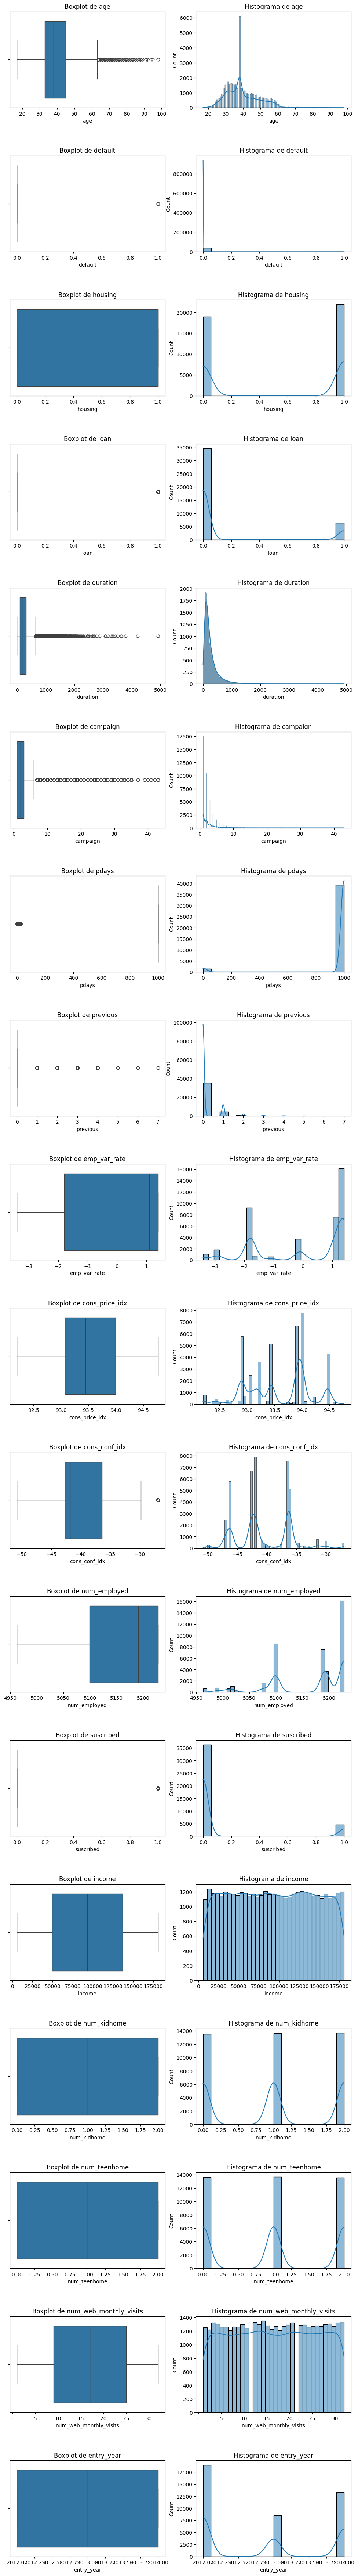

In [73]:
col_num = df.select_dtypes(include=['number']).columns.tolist()

fig, ax = plt.subplots(nrows=len(col_num), ncols=2, figsize=(12, 5 * len(col_num)))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    # Boxplot en la primera columna
    sns.boxplot(x=df[col], ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot de {col}')
    
    # Histograma en la segunda columna
    sns.histplot(df[col], kde=True, ax=ax[i, 1])
    ax[i, 1].set_title(f'Histograma de {col}')

plt.show()

Observaciones:

- age: Podemos ver que el boxplot marca varios outliers, no los quitamos ya que entre 60 y 100 años es una edad totalmente posible y normal. Vemos también que la mayoría de edades se concentran entre los 30 y los 60, con un pico en los 40 ya que imputamos ahí los nulos. Hay también algún valor de 17 años, es un error ya que siendo menor de edad no peudes ser cliente de un banco.

- default: Solo hay 3 valores que valen 1, los dejamos

- housing: los clientes con prestamos hipotecarios son casi parejos en número a los que no tienen

- loan: la mayoría de clientes no tienen otro tipo de préstamo

- duration: Marca como outliers los que tienen una duración de llamada en la última interacción de mas de alrededor de 800 segundos, y tenemos valores de hasta 5000, algo extraño ya que es mucha duración para una llamada y además la std es de 259, si podríamos considerar que hay outliers y se peuden eliminar si no son muchos o hacer alguna agrupción a la hora de analizar. La mayoría de llamadas duran entre 0 y 400 segundos

- campaign: El mismo caso pque duration, es muy extraño que un banco dedique tantas llamadas (recursos) a un cliente, más tarde lo analizaremos bien

- pdays indica el numero de días que han pasadod esde la última llamada en ESTA campaña, la mayoría está en 999, número que podría ser raro ya que puede indicar que no se contactó, en cambio en la variable campaign vemos que toodos han sido contactados en ESTA campaña almenos una vez, por lo tanto vemos un error ahí, eliminaremos la columna pdays.

- previous: Aquí a pesar de marcarse como outliers, hay un número de contactos más razonable, lo dejaremos, a pesar de que la mayoría de clienets no habían sido contactados antes

- suscribed: la mayoría no ha aceptado el crédito bancario

- el income sigue una distribución muy pareja


Procederemos a analizar y/o limpiar los errores vistos en estas observaciones 

In [74]:
df = df[df['age'] != 17]

In [75]:
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Usar la función para obtener los outliers de 'duration' y 'campaign'
outliersd = get_outliers(df, 'duration')
min_outlierd = outliersd['duration'].min() 
max_outlierd = outliersd['duration'].max() 
print(f"El número de outliers en 'duration' es: {outliersd.shape[0]}, "f"mínimo outlier: {min_outlierd}, máximo outlier: {max_outlierd}")

outliersc = get_outliers(df, 'campaign')
min_outlierc = outliersc['campaign'].min()
max_outlierc = outliersc['campaign'].max()
print(f"El número de outliers en 'campaign' es: {outliersc.shape[0]}, "f"mínimo outlier: {min_outlierc}, máximo outlier: {max_outlierc}")



El número de outliers en 'duration' es: 2909, mínimo outlier: 645, máximo outlier: 4918
El número de outliers en 'campaign' es: 2353, mínimo outlier: 7, máximo outlier: 43


Hay una gran cantidad de outliers en ambas variables, en el análisis posterior probaremos a analizar la relación con y sin outliers

eliminamos pdays:

In [76]:
df.drop(columns='pdays', inplace=True)

--------------------

Ya hemos realizado un análisis por separado de cada variable, seguiremos ahora con un análisis univariado con la variable objetivo suscribed para encontrar relaciones y ver características de los clientes que aceptan el crédito bancario:

Empezamos con las variables numéricas

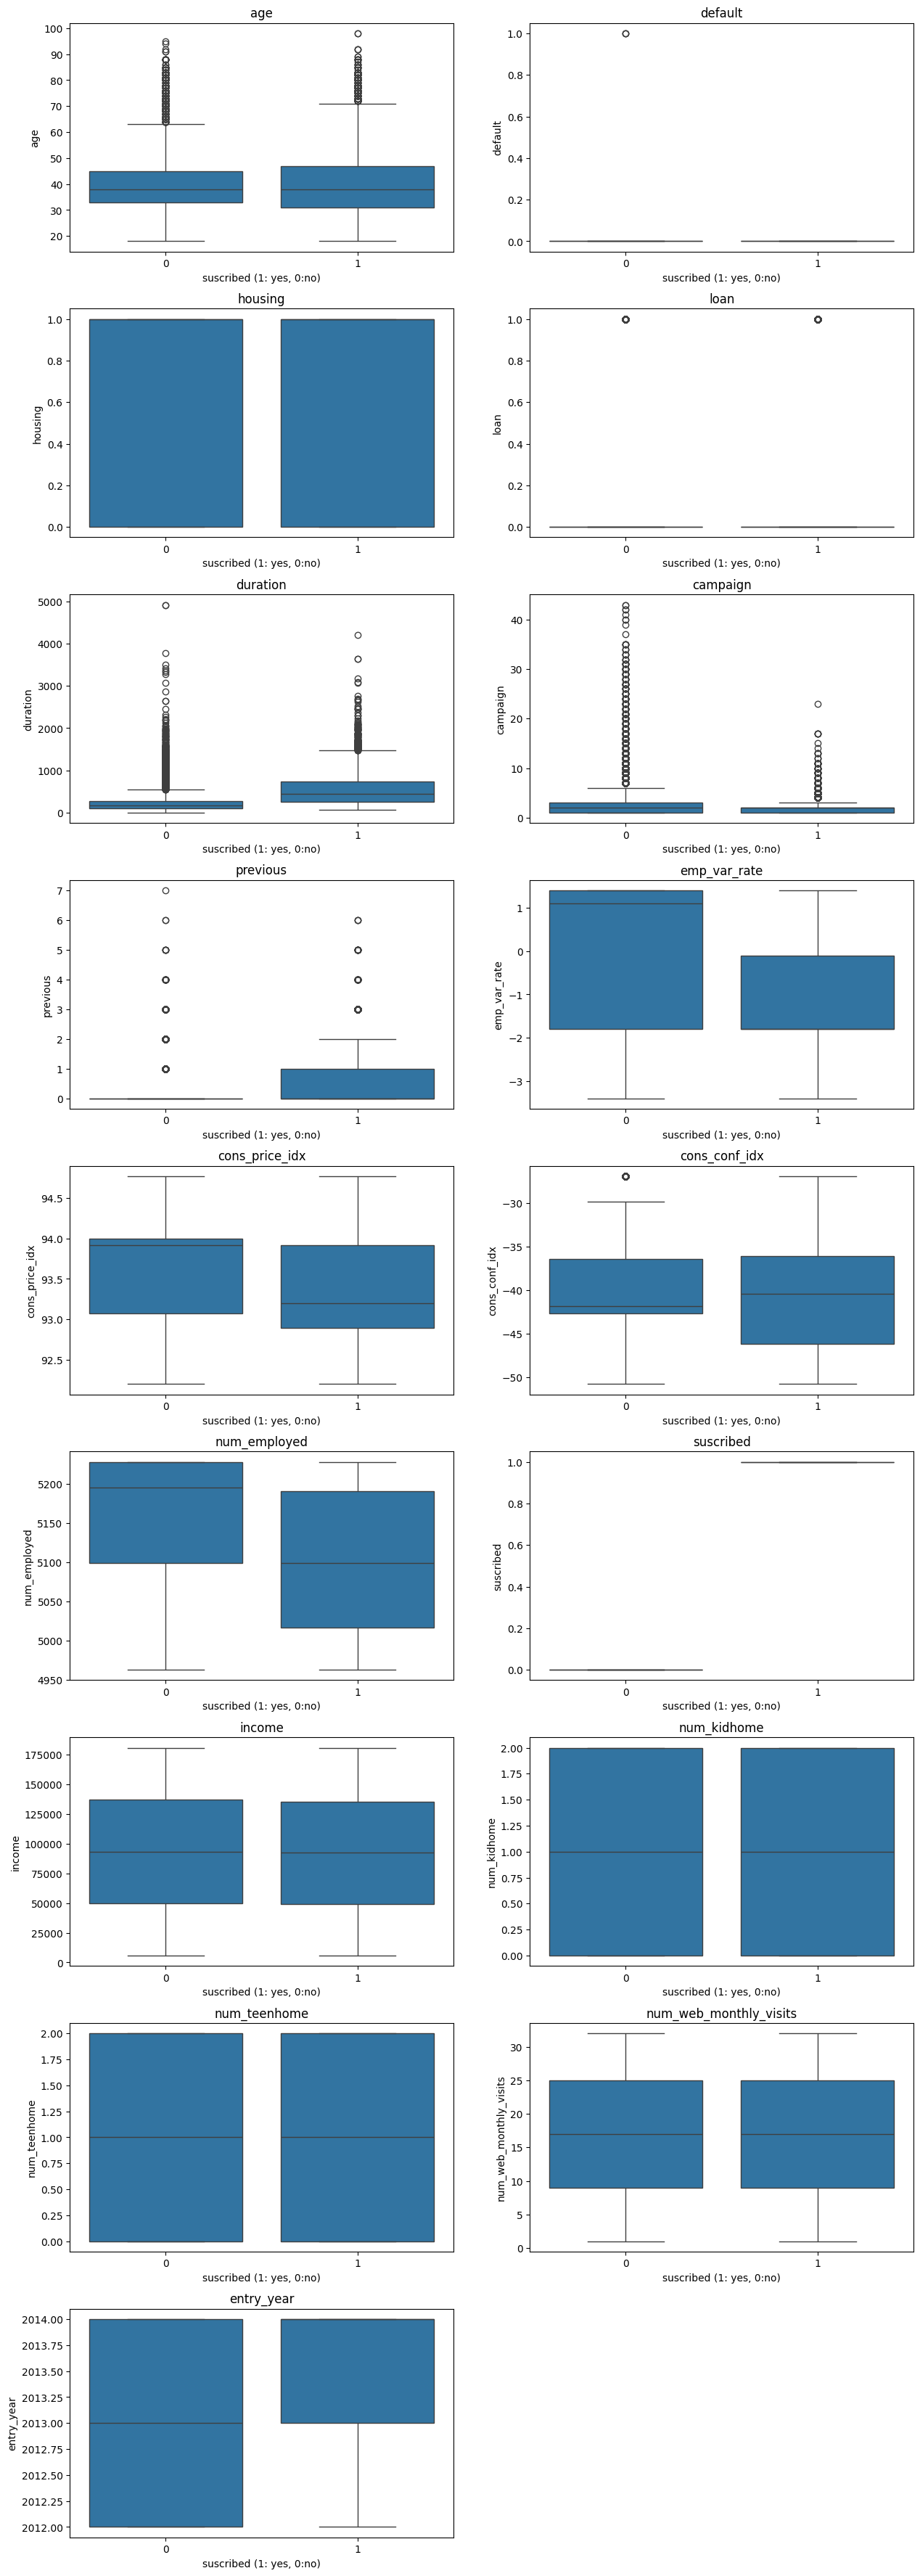

In [77]:
col_num_new = df.select_dtypes(include=['number']).columns.tolist()

# Calcula el número de subgráficos necesarios
ncols = 2  # Número de columnas 
nrows = (len(col_num_new) + ncols - 1) // ncols  # Redondea hacia arriba 

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
fig.subplots_adjust(hspace=0.25)

# Aplana el array de ejes en caso de que sea una matriz
ax = ax.flatten()

for i, col in enumerate(col_num_new):
    sns.boxplot(x='suscribed', y=col, data=df, ax=ax[i])
    ax[i].set_xlabel('suscribed (1: yes, 0:no)')
    ax[i].set_title(col)

# desactivar el gráfico extra
for j in range(i + 1, len(ax)):
    ax[j].axis('off')


Podemos ver como los clientes con llamadas más largas y que han sido contactados anteriormente tienen más posibilidad de aceptar el crédito.

Para ver mejor todas las diferencias calcularemos la tasa de conversión y la graficaremos tanto para numéricas como para categóricas:

In [ ]:
def graficar_tasas_conversion(var_predictora, var_predecir, type = 'line', order = None): #var_predecir solo usaremos suscribed pero lo dejamso así para más flexibilidad
    x, y = var_predictora, var_predecir

    grupo = df.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index() #calculamos la media de suscribed para cada variable predictora y multiplicamos para tener el procentaje

    if type == 'line': #Para variables numéricas continuas
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y = 'tasa_conv', data=grupo)
        plt.grid()
    elif type=='bar': #para rangos o categóricas
        plt.figure(figsize=(14,6))
        sns.barplot(x=var_predictora, y = 'tasa_conv', data=grupo, order=order)
        plt.grid()
    elif type=='scatter': #para rangos o categóricas
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictora, y = 'tasa_conv', data=grupo)
        plt.grid()

C:\Users\sergi\AppData\Local\Temp\ipykernel_9292\1877359100.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14,6))


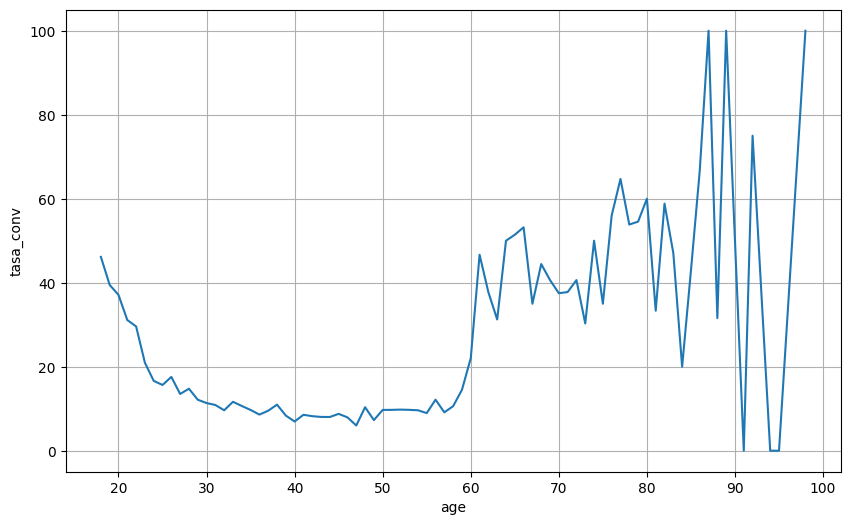

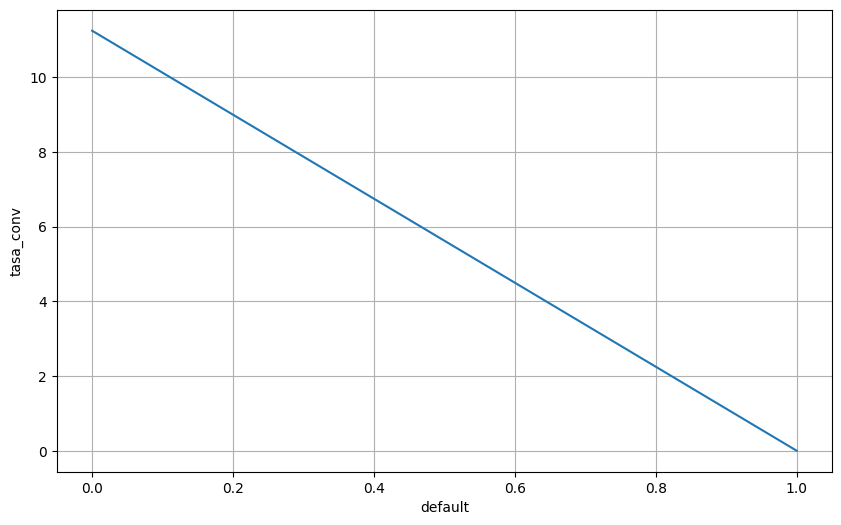

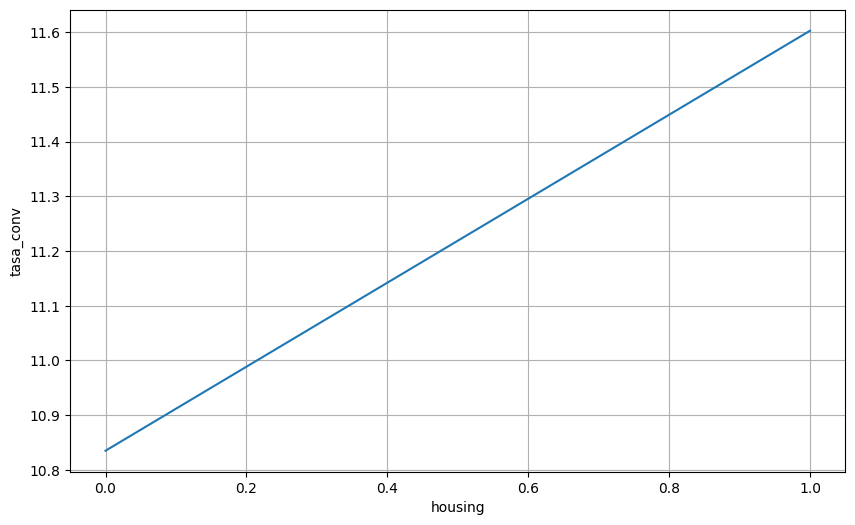

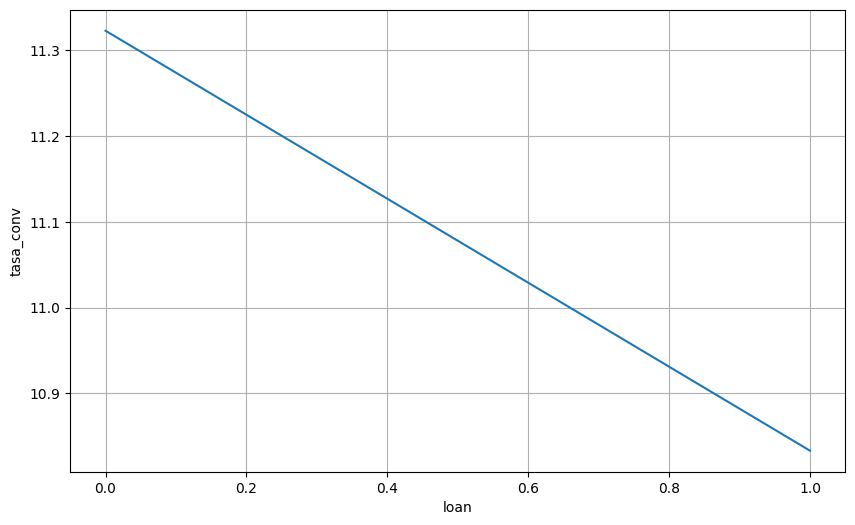

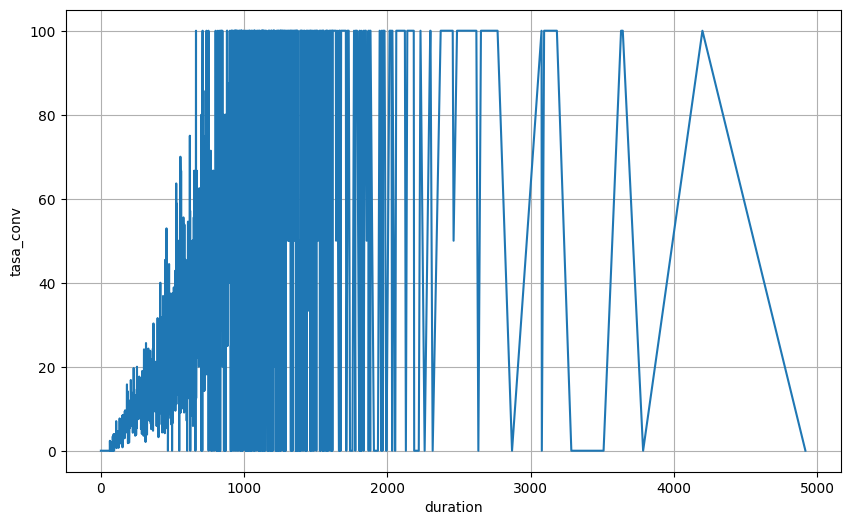

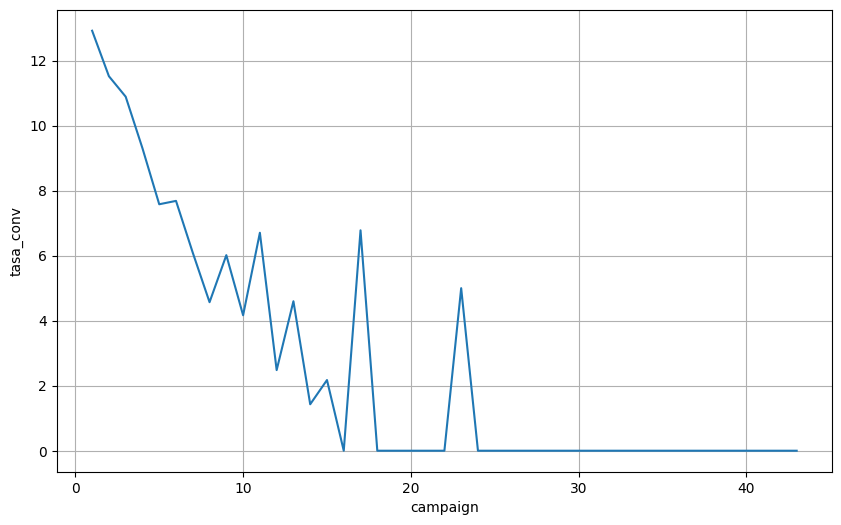

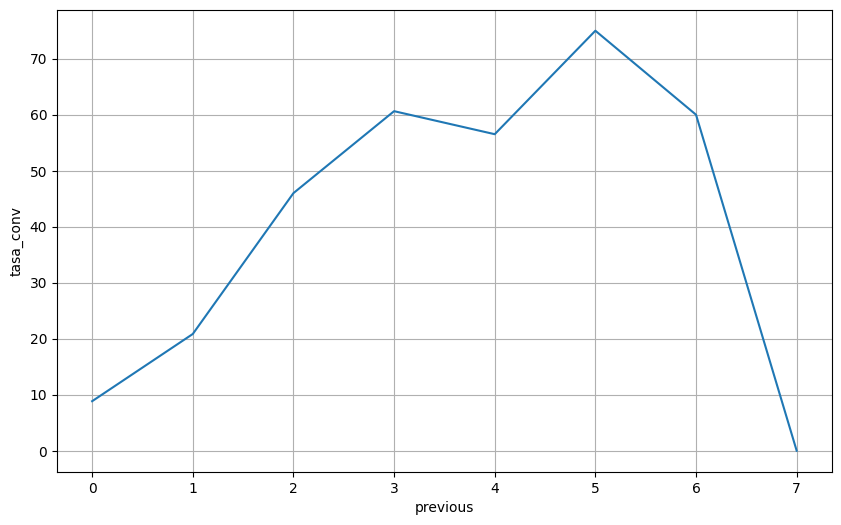

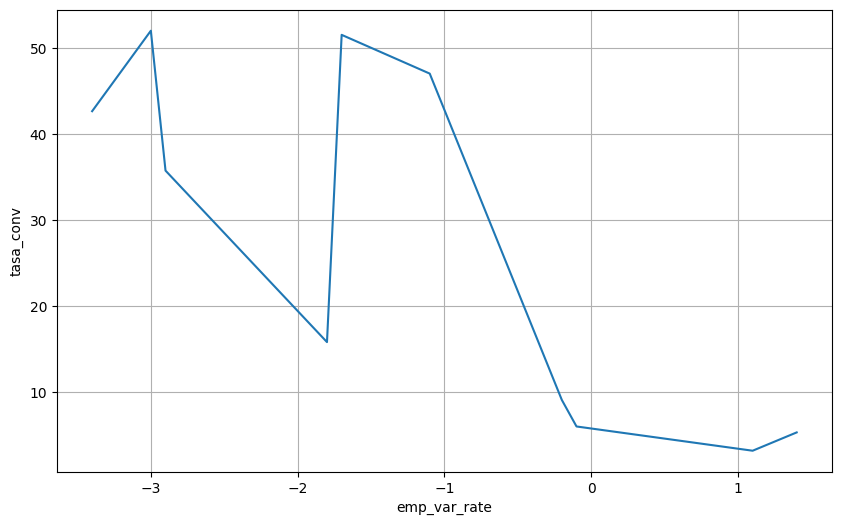

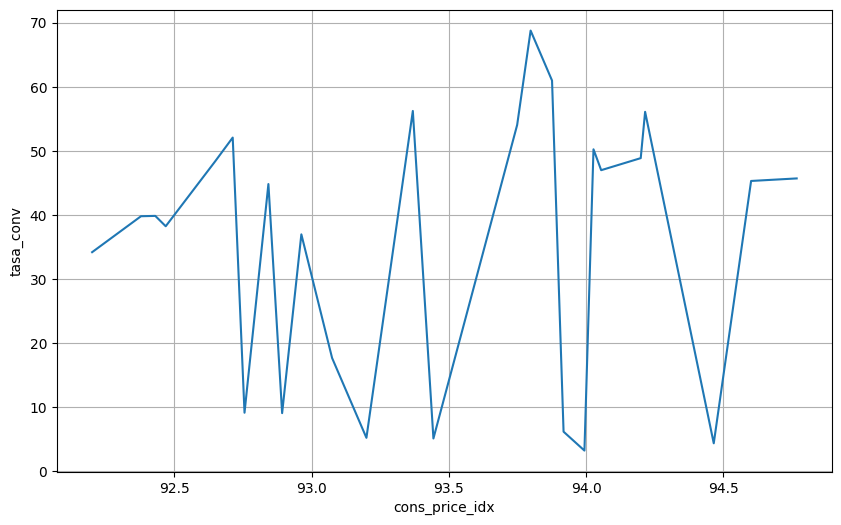

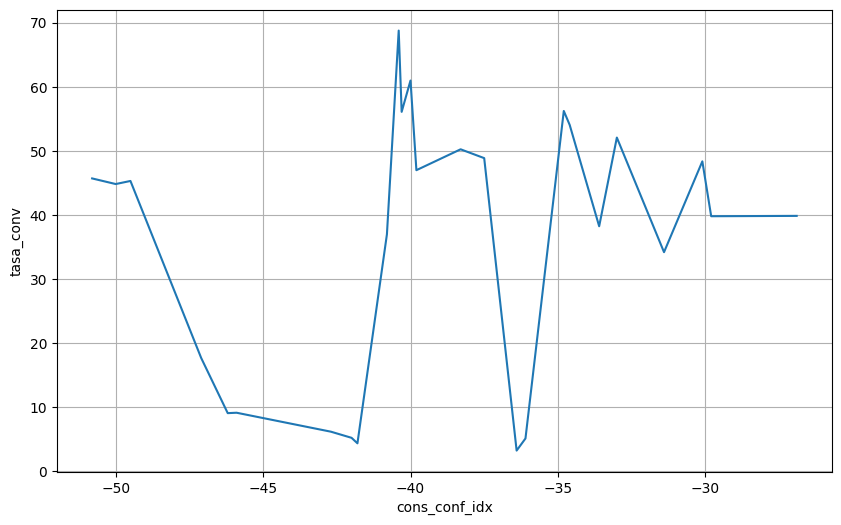

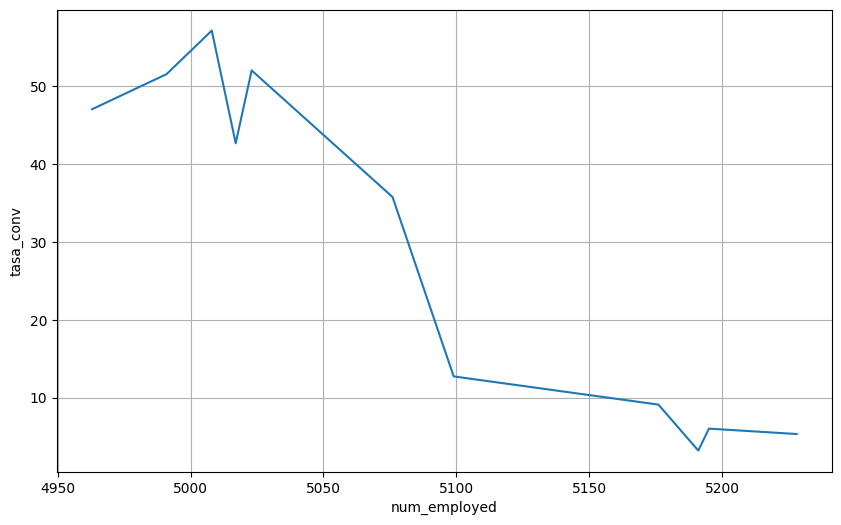

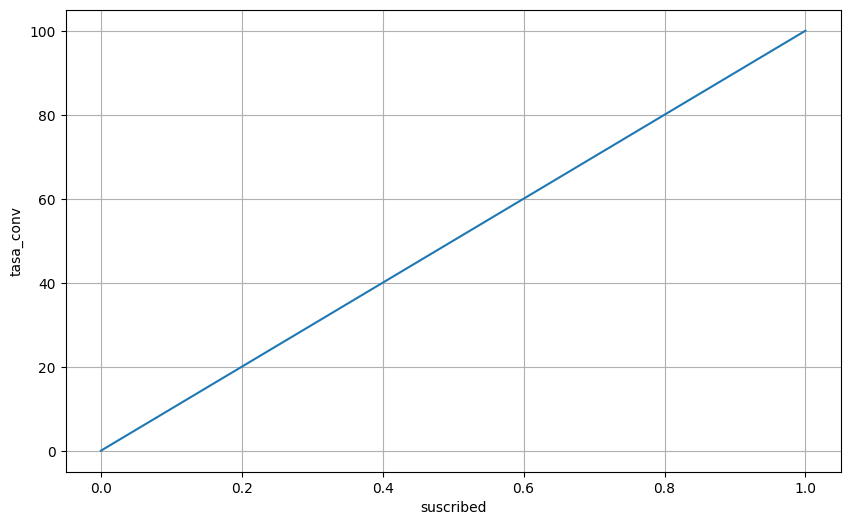

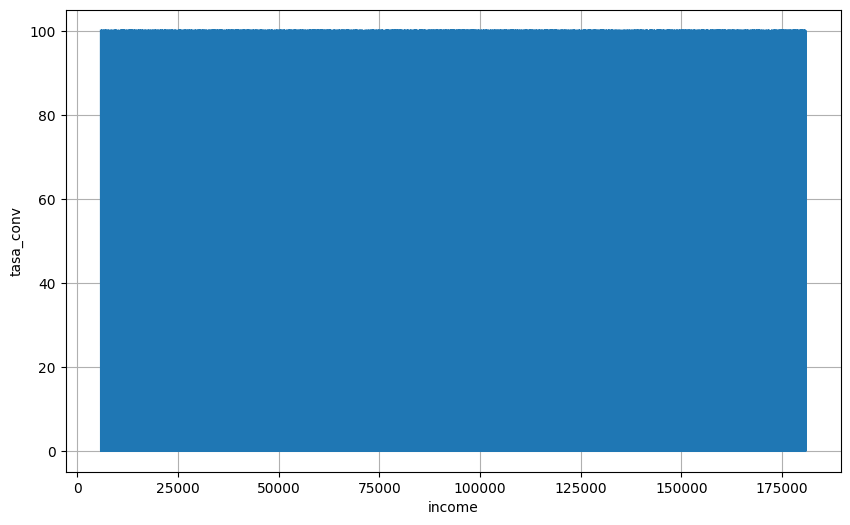

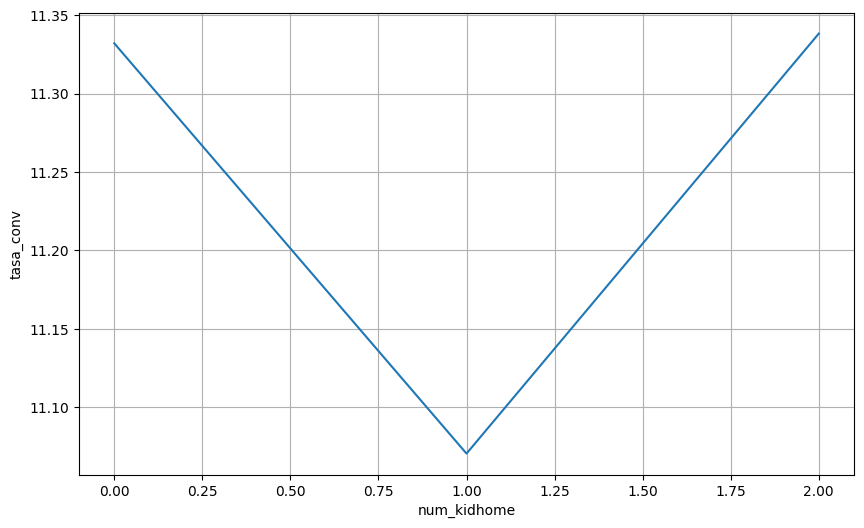

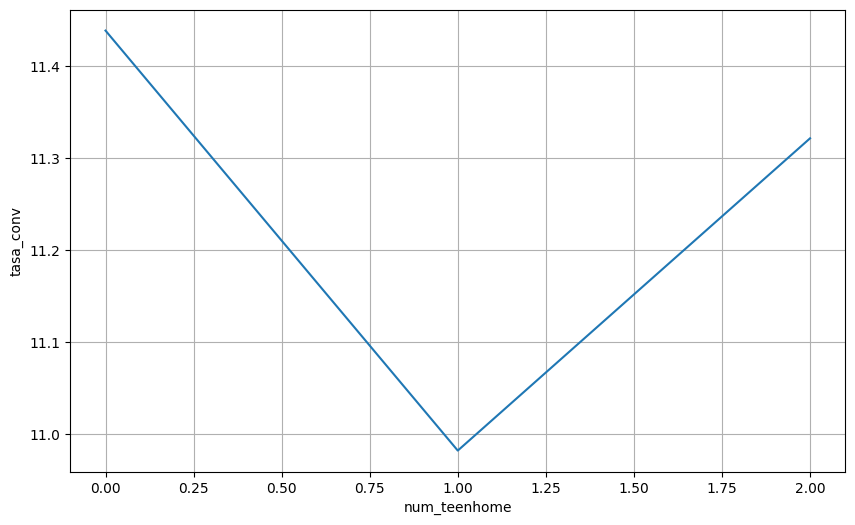

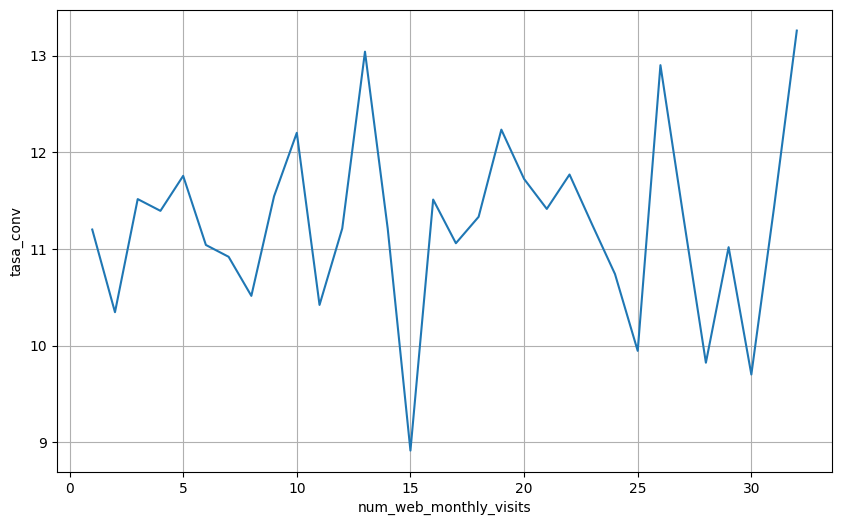

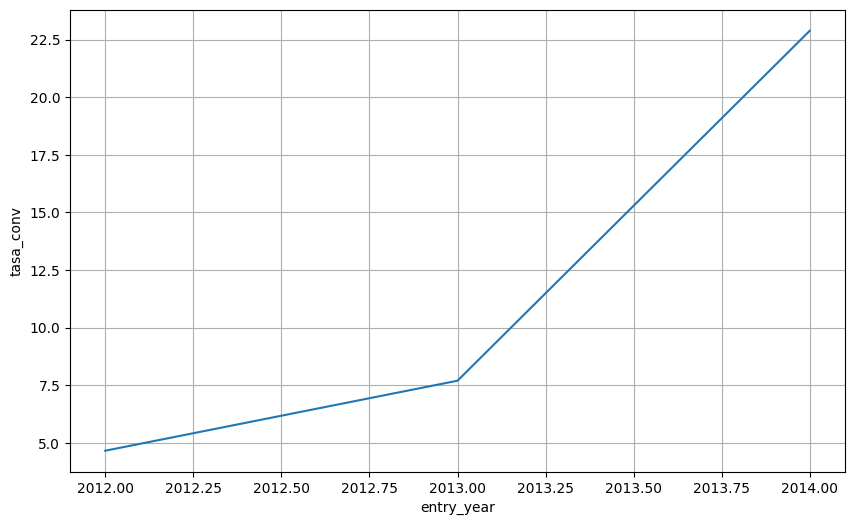

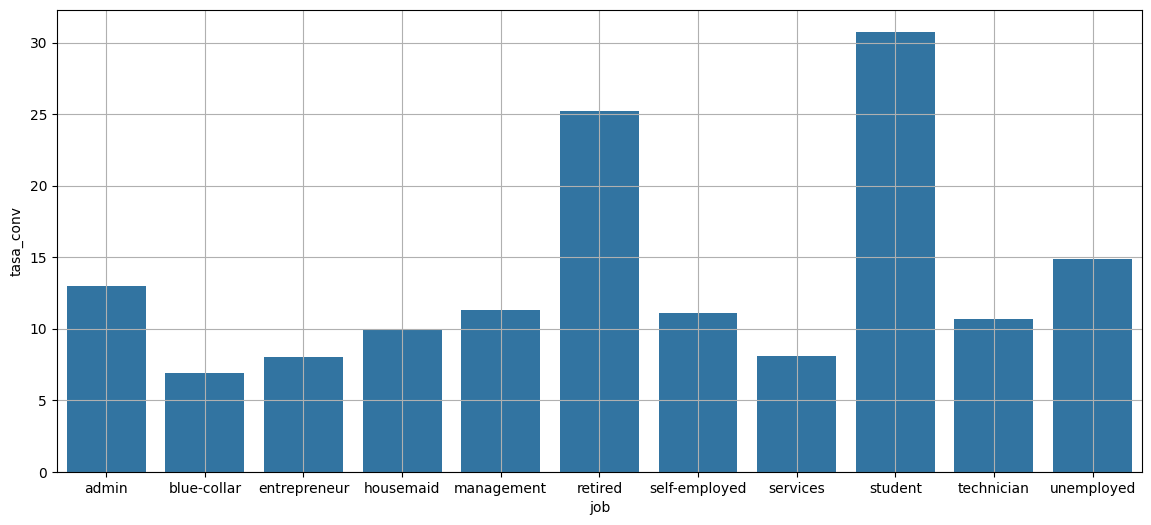

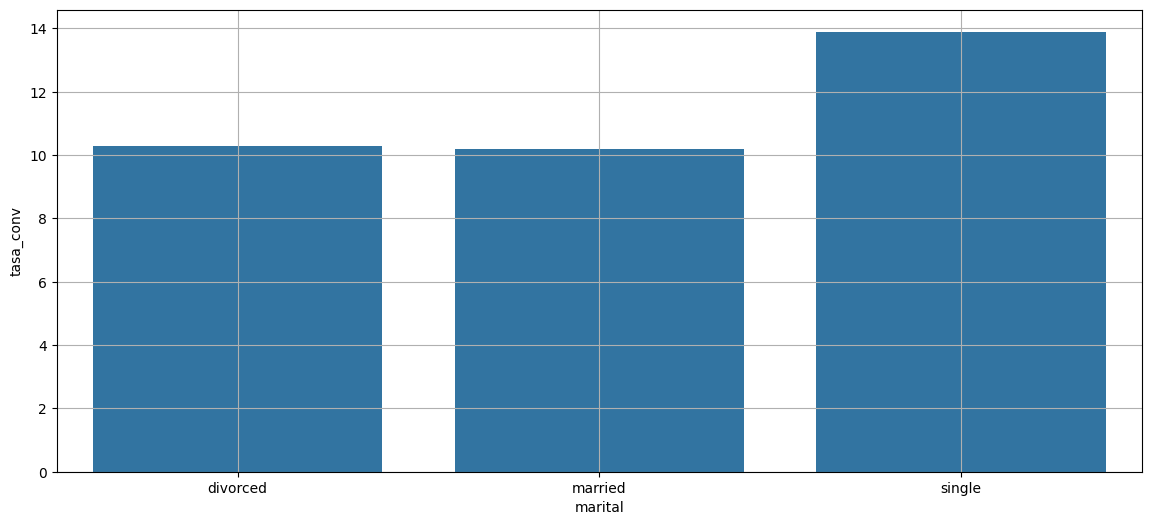

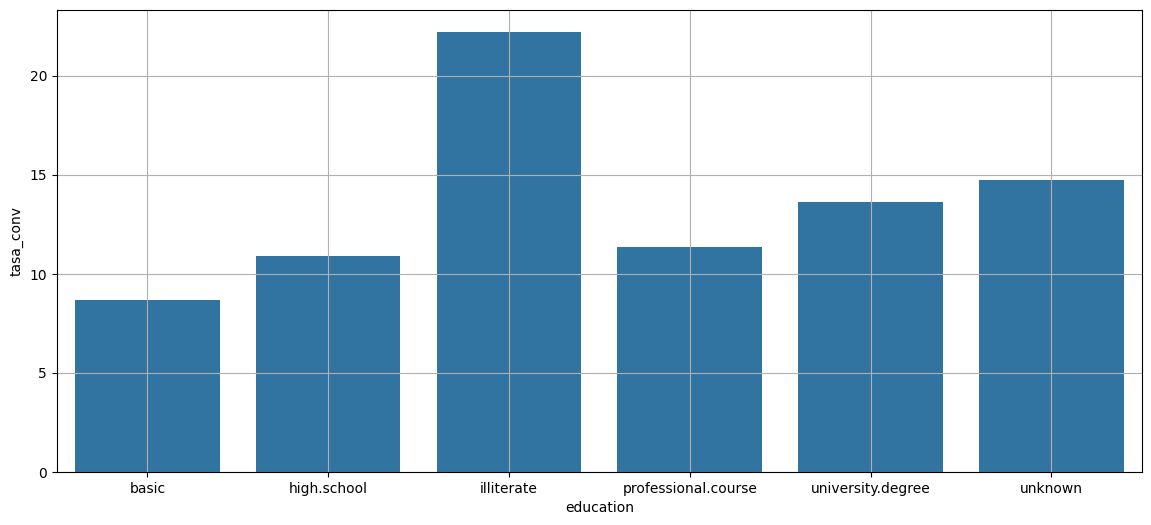

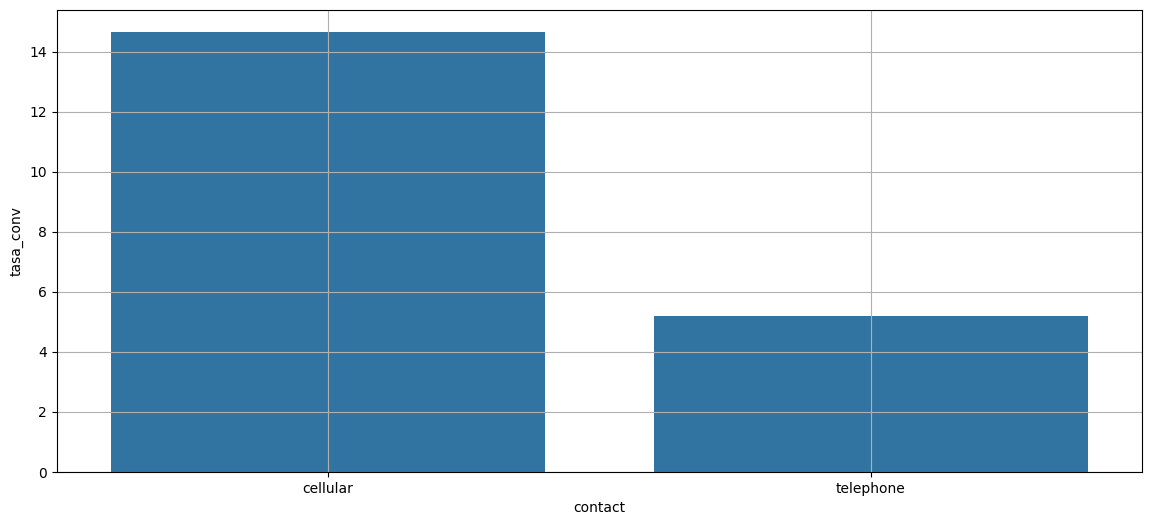

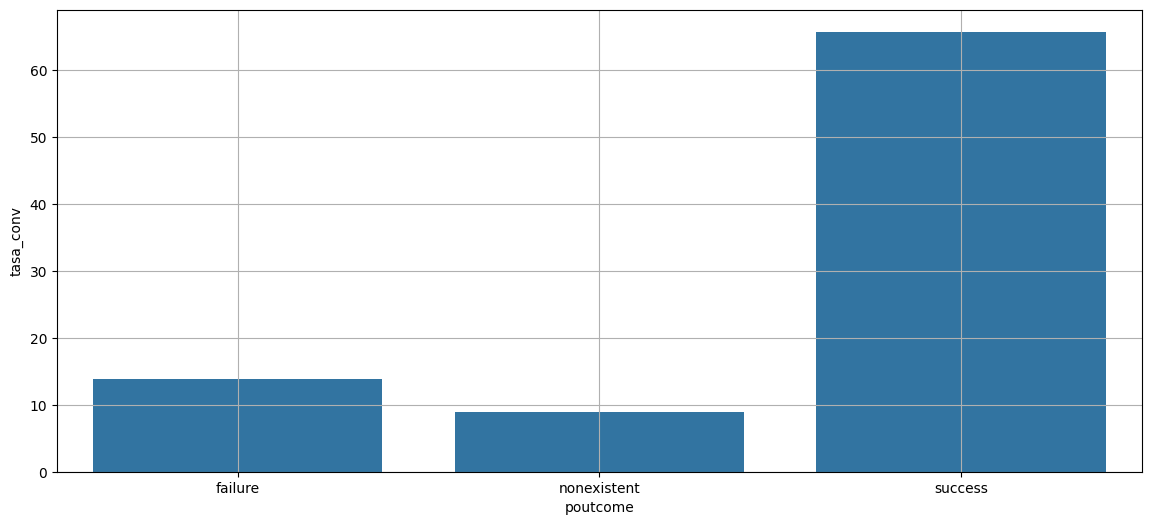

In [79]:
for col in col_num_new:
    graficar_tasas_conversion(col, 'suscribed', type='line')

for col in col_cat:
    graficar_tasas_conversion(col, 'suscribed', type='bar')

Obsevaciones:

- age: Hasta 25 años las tasas son altas, de 25 a 60 bajas, y después suben, picos después de los 85. Creamremos grupos distintos para ver mejor las diferencias, de 18-25 años, de 26 a 59 y de 60 años en adelante

- housing: clientes con préstamos hipotecarios tienen más probabilidad de aceptar el crédito

- duration: Vemos mucha variación, agruparemos para mejor claridad y vovleremos a representarlo

- campaign: Cuantas más veces se contacta a los clientes, más baja la tasa de conversión

- previous: Tasa alta para los que han sido contactados previamente varias veces.

- entry_year: Clientes que entraron en 2024 tienen una mayor tasa de conversión

- job: estudiantes y retirados son los más propensos a aceptar el crédito

- marital: los solteros tienen una mayor probabilidad de aceptar el crédito

- education: hay una ligera subida según más nivel de estudios (iliterate es una muestra muy pequeña como para contarla)

- contact: los contactados por celular tienen más probabiliddades de aceptar el crédito

- Mucha difererencia entre los que ya habían aceptado la campaña anterior, mucho más propensos a aceptar el crédito

C:\Users\sergi\AppData\Local\Temp\ipykernel_9292\1877359100.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = df.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()


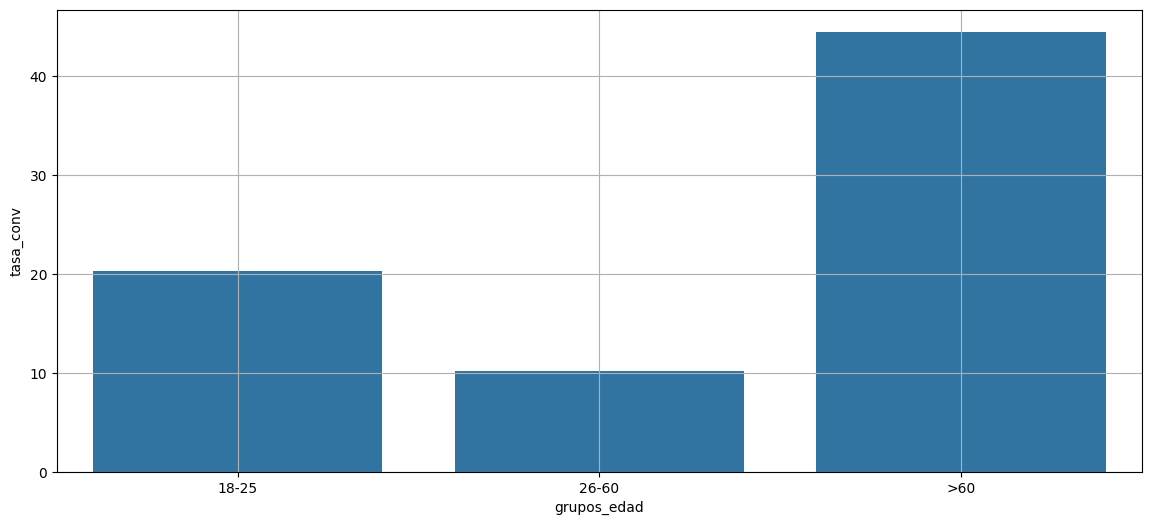

In [81]:
df['grupos_edad'] = pd.cut(df['age'], bins=[18, 25, 60, df['age'].max()], labels=["18-25", "26-60", ">60"], right=True)


graficar_tasas_conversion('grupos_edad', 'suscribed', type = 'bar')

Clientes de más de 60 años tienen muchas más probabilidades de aceptar el crédito, los que menos entre 26 y 60

In [82]:
df.duration.describe()

count    40865.000000
mean       257.824764
std        258.933242
min          0.000000
25%        102.000000
50%        179.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

Duration tiene una distribución sesgada, probaremos a agrupar por percentiles

In [83]:
df['duration_group'] = pd.qcut(df['duration'], q=5, labels=["Muy corta", "Corta", "Media", "Larga", "Muy larga"])

C:\Users\sergi\AppData\Local\Temp\ipykernel_9292\1877359100.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = df.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()


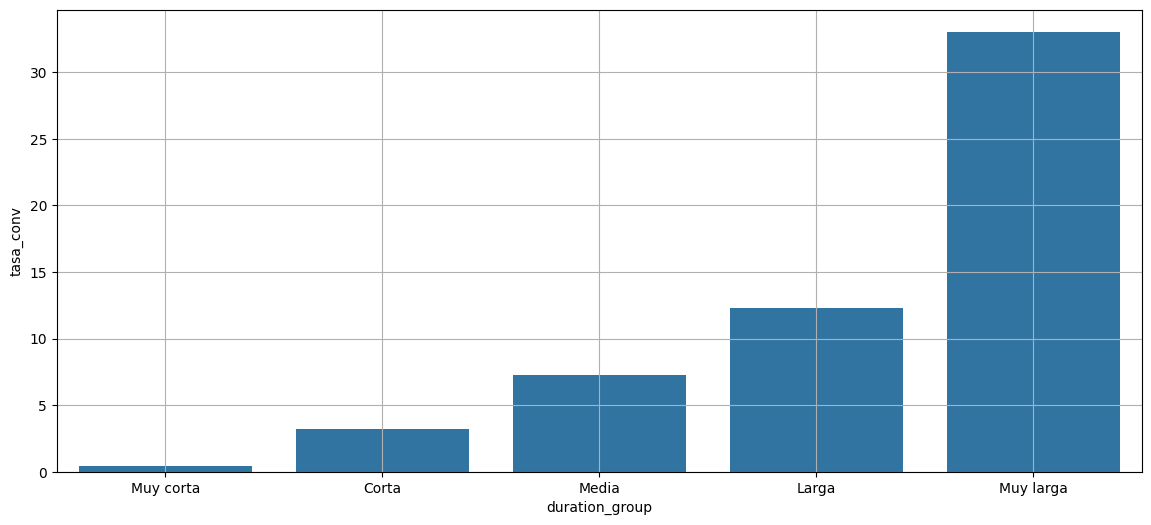

In [84]:
graficar_tasas_conversion('duration_group', 'suscribed', type = 'bar')

Aquí vemos más claramente que cuánto más larga la llamada, mejor tasa de conversión

--------------------

Probaremos ahora con un análisis bivariado para ver si sacamos alguna conclusión más específica

In [85]:
def graficar_tasas_bivariado(col_list, orden=None):
    tc = df.groupby(col_list)['suscribed'].mean().to_frame().reset_index()

    plt.figure(figsize=(13,7))
    ax = sns.pointplot (x=tc['suscribed'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False)
    ax.yaxis.grid(True)
    ax.xaxis.grid(True)
    plt.title(f'Tasa de conversión para {col_list[0]} y {col_list[1]}')
    plt.xlabel('Tasa de conversión (%)')
    plt.xlim((0,1))

C:\Users\sergi\AppData\Local\Temp\ipykernel_9292\4064243039.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tc = df.groupby(col_list)['suscribed'].mean().to_frame().reset_index()
C:\Users\sergi\AppData\Local\Temp\ipykernel_9292\4064243039.py:5: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot (x=tc['suscribed'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False)


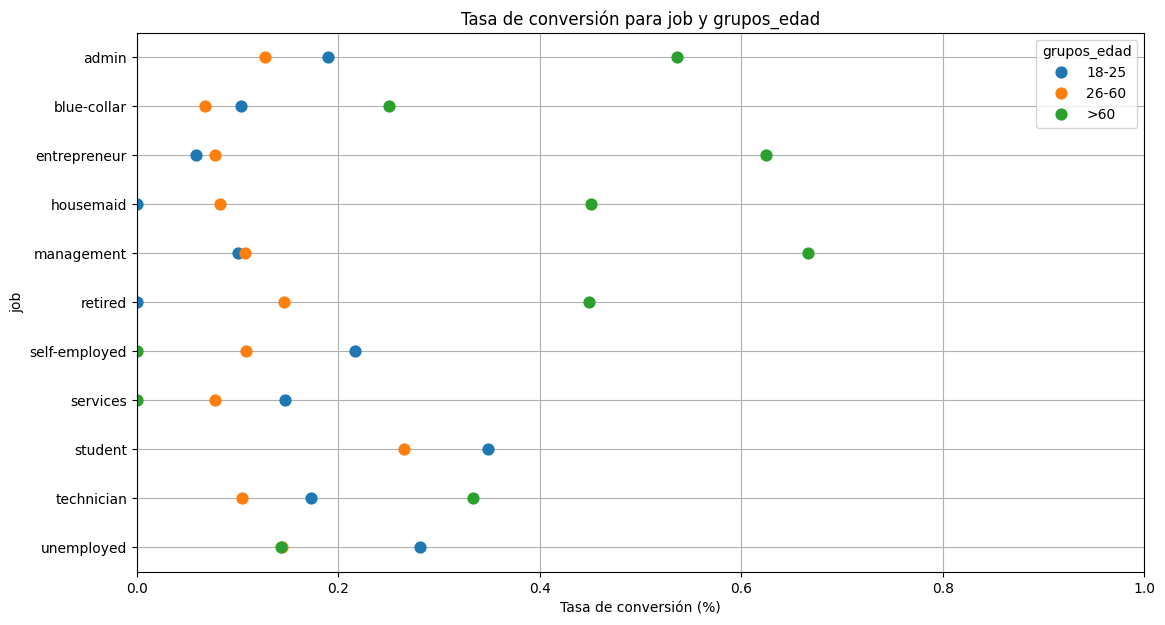

In [91]:
graficar_tasas_bivariado(['job','grupos_edad'])

Podemos observar que entre grupos de edad y job hay diferencias, los que más tasa de conversión tienen dentro de los dos grupos potentes, >60 y 18-15, son: Mayores de 60 dedicados al management, emprendedores y admin, y y de 18-25 los estudiantes y desempelados

C:\Users\sergi\AppData\Local\Temp\ipykernel_9292\4064243039.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tc = df.groupby(col_list)['suscribed'].mean().to_frame().reset_index()
C:\Users\sergi\AppData\Local\Temp\ipykernel_9292\4064243039.py:5: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot (x=tc['suscribed'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False)


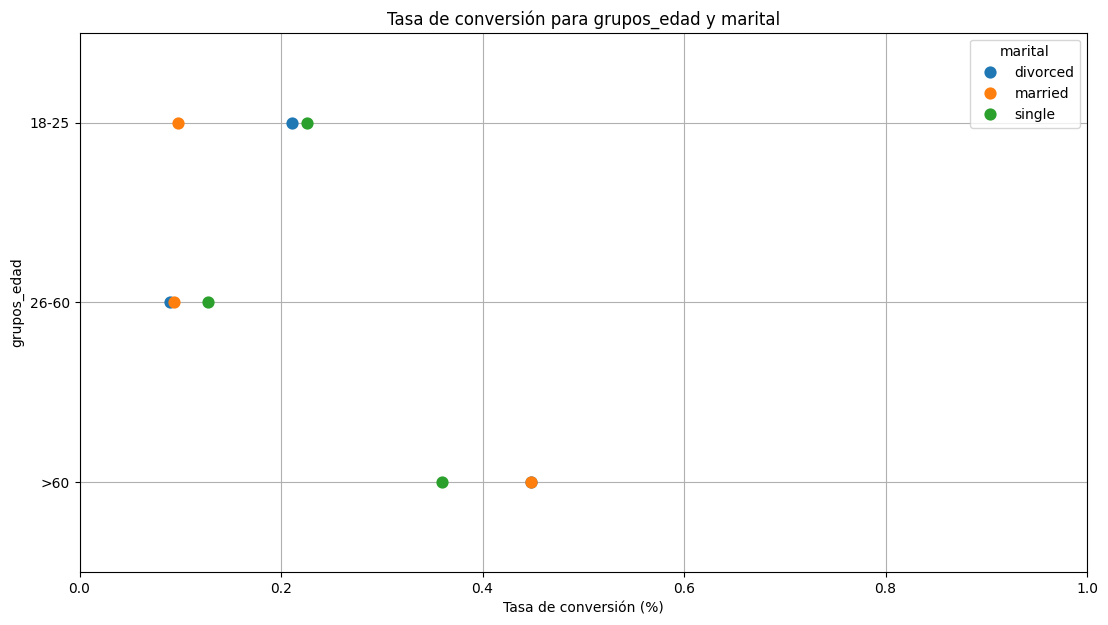

In [101]:
graficar_tasas_bivariado(['grupos_edad', 'marital'])

C:\Users\sergi\AppData\Local\Temp\ipykernel_9292\4064243039.py:5: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot (x=tc['suscribed'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False)


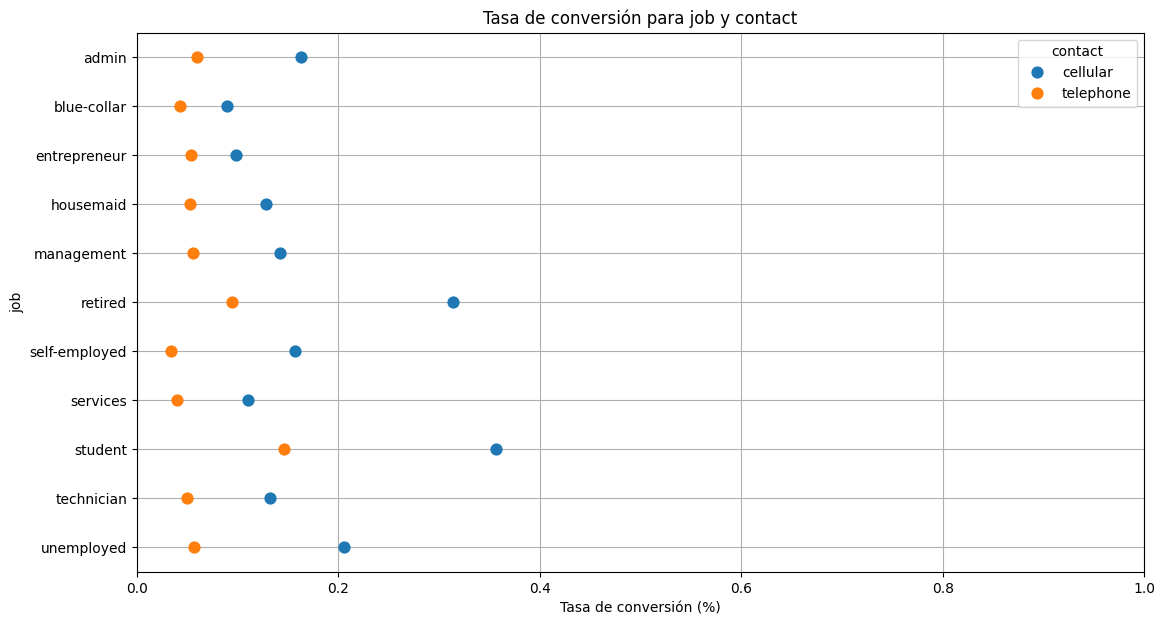

In [102]:
graficar_tasas_bivariado(['job', 'contact'])

C:\Users\sergi\AppData\Local\Temp\ipykernel_9292\4064243039.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tc = df.groupby(col_list)['suscribed'].mean().to_frame().reset_index()
C:\Users\sergi\AppData\Local\Temp\ipykernel_9292\4064243039.py:5: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot (x=tc['suscribed'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False)


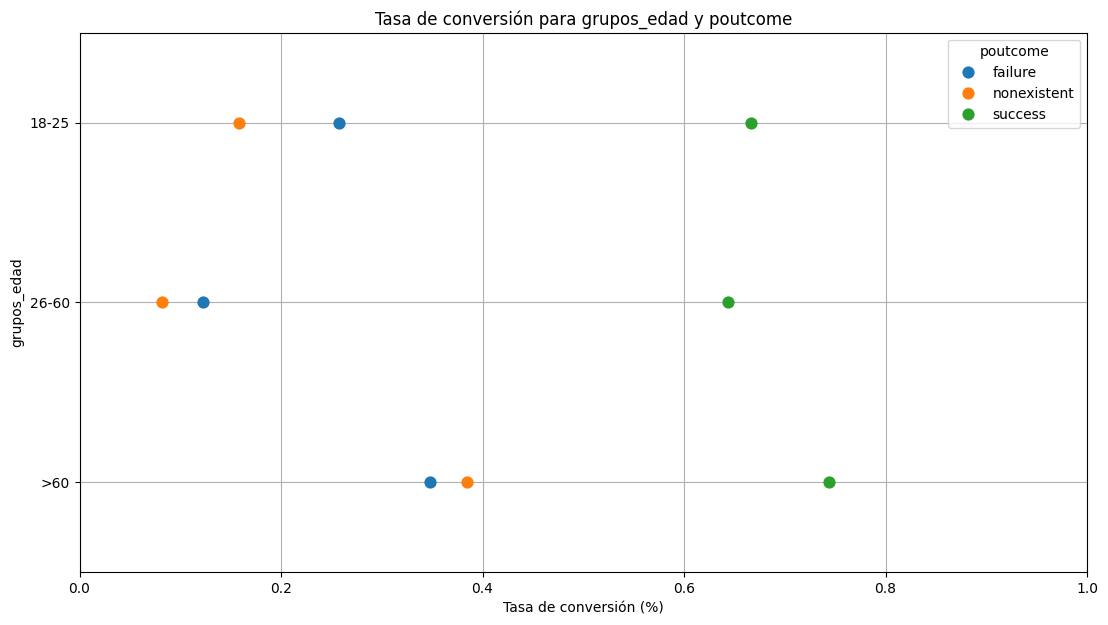

In [104]:
graficar_tasas_bivariado(['grupos_edad', 'poutcome'])

No sacamos más información relevante de estos análisis bivariados

-----------------------------

### Conclusiones finales

Las personas más propensas a aceptar el crédito bancario son:

- Clientes que aceptaron la campaña de marketing anterior
- Personas con más de 60 años, especialmente los dedicados almanagement, son emprendedores o administrativos, después de esas edad, las personas de entre 18 y 25, especialmente losq ue están o estudiando o desempelados
- Clientes con préstamos hipotecarios
- Clientes cuyas llamadas duran más que la media
- Estudiantes y retirados
- Clientes contactados por celular
- Solteros